In [1]:

import yerbamate
env = yerbamate.Environment()

from twitter.data.loader.spark import get_tweets_session

tweets_df = get_tweets_session(['userId', 'id', 'user.created'])

tweets_df = tweets_df.withColumnRenamed("user.created", "created")

# filter users created >= 2022-09-16
tweets_df = tweets_df.filter(tweets_df.created >= '2022-09-16')

# groupby userId to get the number of tweets per user
tweets_df = tweets_df.groupBy('userId').count()

pandas_df = tweets_df.toPandas()


23/06/24 15:41:11 WARN Utils: Your hostname, aleni resolves to a loopback address: 127.0.1.1; using 192.168.1.124 instead (on interface wlp4s0)
23/06/24 15:41:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/24 15:41:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


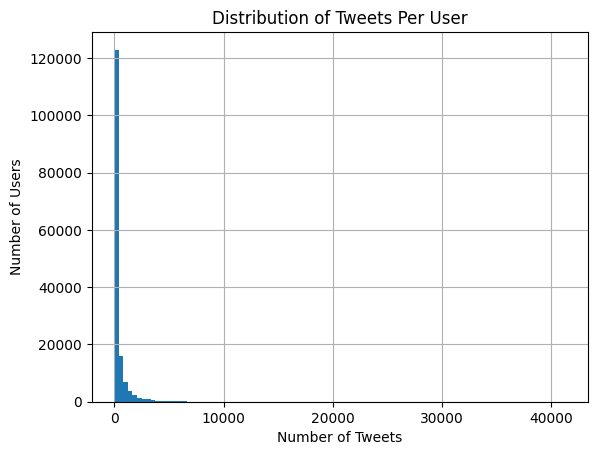

In [4]:
import matplotlib.pyplot as plt

# plot the number of tweets per user

# Plot the distribution of tweets per user
pandas_df['count'].hist(bins=100)
plt.title('Distribution of Tweets Per User')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Users')
plt.show()

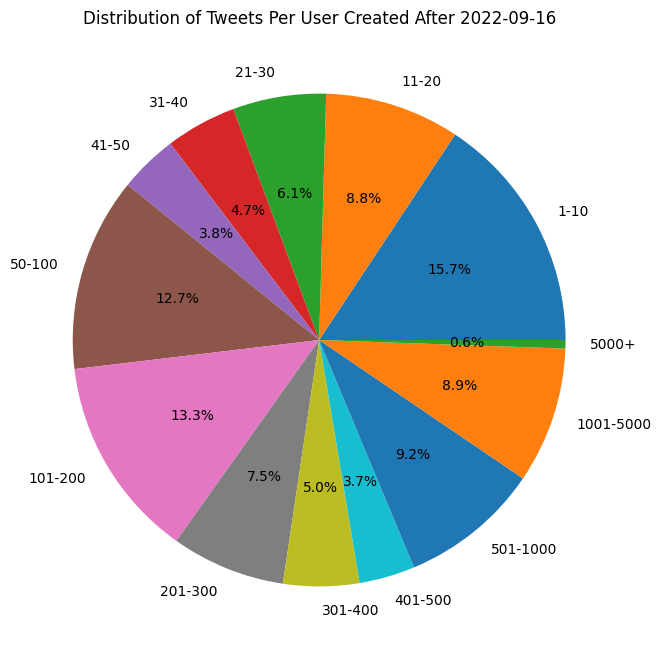

In [12]:
import numpy as np, pandas as pd

# Define bins for number of tweets
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 5000, np.inf]
names = ['1-10', '11-20', '21-30', '31-40', '41-50', '50-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-5000', '5000+']

# Create a new column in the DataFrame for the range of tweets
pandas_df['range'] = pd.cut(pandas_df['count'], bins, labels=names)

# Count the number of users in each range
range_counts = pandas_df['range'].value_counts()

# sort by names
range_counts = range_counts.sort_index()

# Plot the pie chart
plt.figure(figsize=(10,8))
plt.pie(range_counts, labels = range_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tweets Per User Created After 2022-09-16')
plt.show()
